In [1]:
import numpy as np
import pandas as pd
from mat_balance import MaterialBalance
from solver import SolverMatbal
from uuid import uuid4

step=601
file='.conf-data/Выгрузка_режимы_1А.xlsx'
df_vregs = pd.read_excel(file, sheet_name='Матрица')
df_wgp = pd.read_excel(file, sheet_name='WGP')
df_rgipg = pd.read_excel(file, sheet_name='RGIPG')
df_rpr = pd.read_excel(file, sheet_name='RPR')
columns=df_vregs.columns[2:]
wgp = df_wgp[columns].iloc[1:].to_numpy(float)[:step]
rgipg = df_rgipg[columns].to_numpy()[:step]
rpr = df_rpr[columns].to_numpy()[:step]
vregs=df_vregs[columns].iloc[1:].fillna(0).to_numpy()

mb = MaterialBalance(wgp, rgipg[0], rpr[0])

In [2]:
solver = SolverMatbal(mb, rpr, vregs)
opt = solver.opt_mininize()
j_2d = solver.get_j2d(opt.x)
pd.DataFrame(j_2d).to_excel(f'j_2d/{step}-{uuid4()}.xlsx')

In [ ]:
# j_2d=pd.read_excel('j_2d/60-5002be70-9c99-460e-9d8e-ff6a11d58599.xlsx', index_col=0).to_numpy()

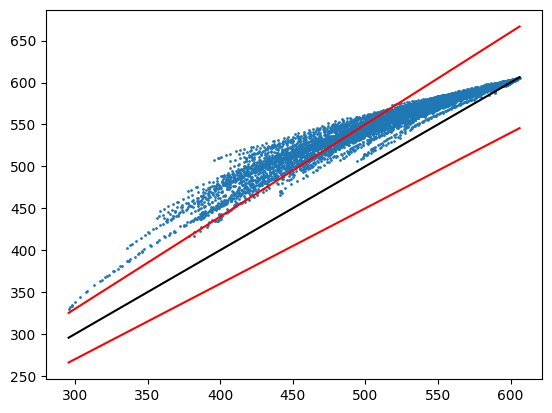

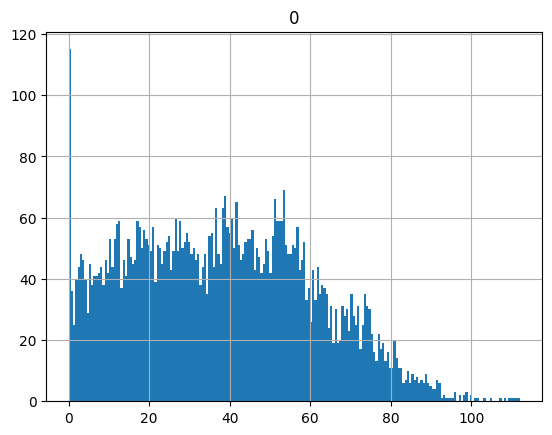

In [ ]:
import matplotlib.pyplot as plt
n=len(vregs)
res_opt =mb.calc(j_2d)


mrpr=mb.p_z(rpr).reshape(-1)
fact_model = np.array([np.array([r.x for r in res_opt]).reshape(-1), mrpr]).T

plt.scatter(mrpr, [r.x for r in res_opt], s=1)

p=0.1
x=np.linspace(mrpr.min(), mrpr.max(), 2)
plt.plot(x, x, color='k')
plt.plot(x, x*(1+p), color='r')
plt.plot(x, x*(1-p), color='r')


ax=pd.DataFrame(abs(np.diff(fact_model, axis=1))).hist(bins=200)
